In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [18]:
# Load the dataset
df = pd.read_csv("C:/Users/Janidu/Desktop/AIML/heart_disease_risk.csv")

# Display basic information
print(f"Original shape: {df.shape}")
print("Original columns:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)

Original shape: (70000, 19)
Original columns: ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender', 'Age', 'Heart_Risk']

First few rows:
   Chest_Pain  Shortness_of_Breath  Fatigue  Palpitations  Dizziness  \
0         0.0                  0.0      0.0           1.0        0.0   
1         0.0                  1.0      0.0           1.0        0.0   
2         1.0                  0.0      0.0           1.0        0.0   
3         1.0                  1.0      0.0           1.0        0.0   
4         0.0                  0.0      1.0           0.0        1.0   

   Swelling  Pain_Arms_Jaw_Back  Cold_Sweats_Nausea  High_BP  \
0       0.0                 0.0                 0.0      0.0   
1       0.0                 0.0                 0.0      1.0   
2       0.0            

In [19]:
# Create a copy of the DataFrame
df_engineered = df.copy()

In [20]:
# Create age-based features
df_engineered['Age_Group_Young'] = (df['Age'] <= 35).astype(int)
df_engineered['Age_Group_Middle'] = ((df['Age'] > 35) & (df['Age'] <= 55)).astype(int)
df_engineered['Age_Group_Senior'] = ((df['Age'] > 55) & (df['Age'] <= 70)).astype(int)
df_engineered['Age_Group_Elderly'] = (df['Age'] > 70).astype(int)

df_engineered['Age_Risk_Score'] = pd.cut(df['Age'], 
                                         bins=[0, 40, 60, 80, 100], 
                                         labels=[1, 2, 3, 4]).astype(int)

In [21]:
# Create composite risk factors
df_engineered['Metabolic_Risk'] = (df['Obesity'] + df['High_BP'] + 
                                   df['High_Cholesterol'] + df['Diabetes'])

df_engineered['Lifestyle_Risk'] = (df['Smoking'] + df['Sedentary_Lifestyle'] + 
                                   df['Chronic_Stress'])

df_engineered['Total_Risk_Factors'] = (df['Family_History'] + df['Smoking'] + 
                                       df['Diabetes'] + df['Obesity'] + df['High_BP'] + 
                                       df['High_Cholesterol'] + df['Sedentary_Lifestyle'] + 
                                       df['Chronic_Stress'])

In [22]:
# Create interaction features
df_engineered['Diabetes_Obesity'] = df['Diabetes'] * df['Obesity']
df_engineered['Smoking_High_BP'] = df['Smoking'] * df['High_BP']
df_engineered['Age_Diabetes'] = (df['Age'] > 50).astype(int) * df['Diabetes']
df_engineered['Family_Lifestyle'] = df['Family_History'] * df['Sedentary_Lifestyle']
df_engineered['Triple_Threat'] = df['Smoking'] * df['Diabetes'] * df['High_BP']

df_engineered['Male_High_Risk'] = df['Gender'] * (df['Age'] > 45).astype(int)
df_engineered['Female_High_Risk'] = (1 - df['Gender']) * (df['Age'] > 55).astype(int)

In [23]:
# Create risk level categories
df_engineered['Risk_Level_Low'] = (df_engineered['Total_Risk_Factors'] <= 2).astype(int)
df_engineered['Risk_Level_Medium'] = ((df_engineered['Total_Risk_Factors'] >= 3) & 
                                      (df_engineered['Total_Risk_Factors'] <= 5)).astype(int)
df_engineered['Risk_Level_High'] = (df_engineered['Total_Risk_Factors'] >= 6).astype(int)

In [24]:
# Create normalized age feature
scaler = StandardScaler()
df_engineered['Age_Normalized'] = scaler.fit_transform(df[['Age']]).flatten()

In [25]:
# Feature engineering summary
original_features = df.shape[1]
new_features = df_engineered.shape[1]
engineered_features = new_features - original_features
print(f"\nOriginal features: {original_features}")
print(f"After feature engineering: {new_features}")
print(f"New features created: {engineered_features}")

new_feature_names = [col for col in df_engineered.columns if col not in df.columns]
print("\nNew features created:")
for i, feature in enumerate(new_feature_names, 1):
    print(f"  {i}. {feature}")


Original features: 19
After feature engineering: 38
New features created: 19

New features created:
  1. Age_Group_Young
  2. Age_Group_Middle
  3. Age_Group_Senior
  4. Age_Group_Elderly
  5. Age_Risk_Score
  6. Metabolic_Risk
  7. Lifestyle_Risk
  8. Total_Risk_Factors
  9. Diabetes_Obesity
  10. Smoking_High_BP
  11. Age_Diabetes
  12. Family_Lifestyle
  13. Triple_Threat
  14. Male_High_Risk
  15. Female_High_Risk
  16. Risk_Level_Low
  17. Risk_Level_Medium
  18. Risk_Level_High
  19. Age_Normalized


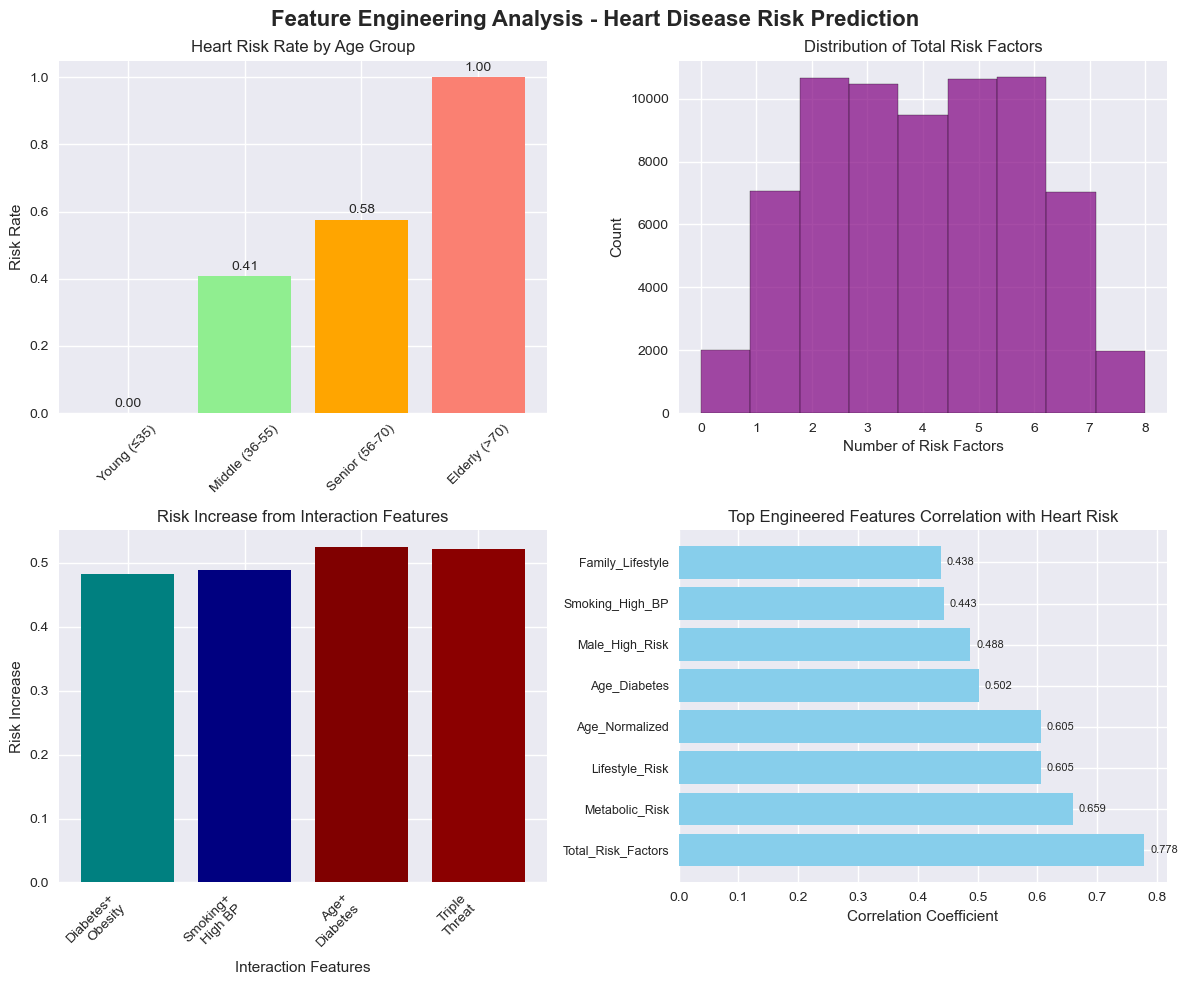

In [26]:
# Create EDA visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjusted to 2x2 grid
fig.suptitle('Feature Engineering Analysis - Heart Disease Risk Prediction', fontsize=16, fontweight='bold')

# Plot 1: Heart Risk Rate by Age Group
age_group_cols = ['Age_Group_Young', 'Age_Group_Middle', 'Age_Group_Senior', 'Age_Group_Elderly']
age_group_data = [df_engineered[df_engineered[col] == 1]['Heart_Risk'].mean() for col in age_group_cols]
group_names = ['Young (≤35)', 'Middle (36-55)', 'Senior (56-70)', 'Elderly (>70)']
bars1 = axes[0,0].bar(group_names, age_group_data, color=['lightblue', 'lightgreen', 'orange', 'salmon'])
axes[0,0].set_title('Heart Risk Rate by Age Group')
axes[0,0].set_ylabel('Risk Rate')
axes[0,0].tick_params(axis='x', rotation=45)
for bar, value in zip(bars1, age_group_data):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')

# Plot 2: Distribution of Total Risk Factors
axes[0,1].hist(df_engineered['Total_Risk_Factors'], bins=9, alpha=0.7, color='purple', edgecolor='black')
axes[0,1].set_title('Distribution of Total Risk Factors')
axes[0,1].set_xlabel('Number of Risk Factors')
axes[0,1].set_ylabel('Count')

# Plot 3: Risk Increase from Interaction Features
interaction_features = ['Diabetes_Obesity', 'Smoking_High_BP', 'Age_Diabetes', 'Triple_Threat']
interaction_data = []
for col in interaction_features:
    present_risk = df_engineered[df_engineered[col] == 1]['Heart_Risk'].mean()
    absent_risk = df_engineered[df_engineered[col] == 0]['Heart_Risk'].mean()
    interaction_data.append(present_risk - absent_risk)
bars3 = axes[1,0].bar(range(len(interaction_features)), interaction_data, color=['teal', 'navy', 'maroon', 'darkred'])
axes[1,0].set_title('Risk Increase from Interaction Features')
axes[1,0].set_xlabel('Interaction Features')
axes[1,0].set_ylabel('Risk Increase')
axes[1,0].set_xticks(range(len(interaction_features)))
axes[1,0].set_xticklabels(['Diabetes+\nObesity', 'Smoking+\nHigh BP', 'Age+\nDiabetes', 'Triple\nThreat'], rotation=45, ha='right')

# Plot 4: Top Engineered Features Correlation with Heart Risk
new_numeric_features = [col for col in new_feature_names if df_engineered[col].dtype in ['int64', 'float64']]
correlation_data = df_engineered[new_numeric_features + ['Heart_Risk']].corr()['Heart_Risk'].sort_values(ascending=False)
top_correlations = correlation_data[correlation_data.index != 'Heart_Risk'].head(8)
bars4 = axes[1,1].barh(range(len(top_correlations)), top_correlations.values, color='skyblue')
axes[1,1].set_title('Top Engineered Features Correlation with Heart Risk')
axes[1,1].set_xlabel('Correlation Coefficient')
axes[1,1].set_yticks(range(len(top_correlations)))
axes[1,1].set_yticklabels(top_correlations.index, fontsize=9)
for i, (bar, value) in enumerate(zip(bars4, top_correlations.values)):
    axes[1,1].text(value + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.3f}', ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()

In [27]:
# Feature engineering impact analysis
original_correlations = df.drop('Heart_Risk', axis=1).corrwith(df['Heart_Risk']).abs()
new_feature_correlations = df_engineered[new_feature_names].corrwith(df_engineered['Heart_Risk']).abs()

print("\nTop 5 Original Feature Correlations:")
print(original_correlations.sort_values(ascending=False).head())

print("\nTop 5 New Feature Correlations:")
print(new_feature_correlations.sort_values(ascending=False).head())

print(f"\nOriginal features mean correlation: {original_correlations.mean():.4f}")
print(f"New features mean correlation: {new_feature_correlations.mean():.4f}")


Top 5 Original Feature Correlations:
Age                   0.605182
Pain_Arms_Jaw_Back    0.601403
Cold_Sweats_Nausea    0.601093
Dizziness             0.600202
Chest_Pain            0.599944
dtype: float64

Top 5 New Feature Correlations:
Total_Risk_Factors    0.778226
Metabolic_Risk        0.659353
Lifestyle_Risk        0.605330
Age_Normalized        0.605182
Risk_Level_Low        0.602406
dtype: float64

Original features mean correlation: 0.4946
New features mean correlation: 0.4380


In [28]:
# Risk distribution analysis
print("\nTotal Risk Factors Distribution:")
print(df_engineered['Total_Risk_Factors'].value_counts().sort_index())

print("\nRisk Level Distribution:")
print(f"Low Risk (≤2 factors): {df_engineered['Risk_Level_Low'].sum()} patients ({df_engineered['Risk_Level_Low'].mean()*100:.1f}%)")
print(f"Medium Risk (3-5 factors): {df_engineered['Risk_Level_Medium'].sum()} patients ({df_engineered['Risk_Level_Medium'].mean()*100:.1f}%)")
print(f"High Risk (≥6 factors): {df_engineered['Risk_Level_High'].sum()} patients ({df_engineered['Risk_Level_High'].mean()*100:.1f}%)")


Total Risk Factors Distribution:
Total_Risk_Factors
0.0     2011
1.0     7051
2.0    10662
3.0    10471
4.0     9482
5.0    10622
6.0    10679
7.0     7038
8.0     1984
Name: count, dtype: int64

Risk Level Distribution:
Low Risk (≤2 factors): 19724 patients (28.2%)
Medium Risk (3-5 factors): 30575 patients (43.7%)
High Risk (≥6 factors): 19701 patients (28.1%)


In [29]:
# Save the engineered dataset
df_engineered.to_csv('http://localhost:8888/tree/2025-Y2-S1-MLB-B6G1-05-PGNO-105/results/outputs/IT24101236_FeatureEngineering.csv', index=False)
print(f"\nEngineered dataset saved with shape: {df_engineered.shape}")


Engineered dataset saved with shape: (70000, 38)
